In [1]:
import cv2
from imutils import *#工具包
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=imread('image.jpg')#工具包的读取方法

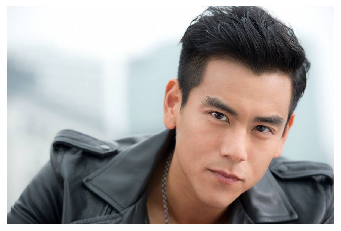

In [3]:
show(image)#工具包里的显示方法

(798, 1200, 3)


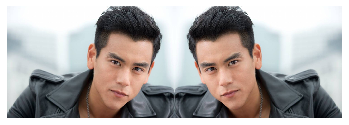

In [4]:
#左右镜像
ishape=image.shape
heigth=ishape[0]
width=ishape[1]
print(ishape)
img = np.zeros((heigth,width*2,3),np.uint8)
for i in range(0,heigth):
    for j in range(0,width):
        img[i,j]=image[i,j]
for i in range(0,heigth):
    x=1
    for j in range(width,width*2):
        img[i,j] = image[i,j-x]
        x=x+2
# for i in range(higth):
#     img[i, width] = (0, 255, 255)
show(img)

In [5]:
dst=cv2.resize(img,None,fx=0.4,fy=0.4,interpolation=cv2.INTER_CUBIC)#对镜像图片进行缩放

In [6]:
#画框
img=cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)#BGR转换为RGB位图
font=cv2.FONT_HERSHEY_PLAIN
cv2.rectangle(img,(550,140),(680,200),(255,0,255),3)
cv2.putText(img,"This is Jin Congming's idol Eddie Peng",(680,180),font,1,(200,170,0),2,cv2.LINE_AA)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

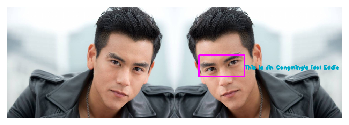

In [7]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#将BGR转换为RGB图像
show(img)

(798, 1200, 3)


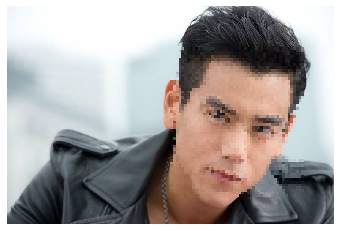

In [8]:
#马赛克
image=imread('image.jpg')
img=image
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
print(imgInfo)
import random
for i in range(150,height-98,10):
    for j in range(600,width-112,10):
        x1=int(random.random()*9)#10*10
        y1=int(random.random()*9)
#         print(b,g,r)
        for ii in range(i,i+10):
            for jj in range(j,j+10):
                img[ii,jj]=img[i+x1,j+y1]
# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
show(img)

In [9]:
#sobel算子 边缘检测
import math
hx=np.array([[1,2,1],
           [0,0,0],
           [-1,-2,-1]])
# print(hx)
hy=np.array([[1,0,-1],
            [2,0,-2],
            [1,0,-1]])
img=cv2.imread('image.jpg',0)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst=np.zeros(imgInfo,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        gx=img[i-1:i+2,j-1:j+2]*hx
        gy=img[i-1:i+2,j-1:j+2]*hy
        gxs=0
        gys=0
        for ii in range(3):
            for jj in range(3):
                gxs=gxs+gx[ii,jj]
                gys=gys+gy[ii,jj]
        th=math.sqrt(gxs*gxs+gys*gys)
        if th>100 :#阈值
            dst[i,j]=255
        else:
            dst[i,j]=0
cv2.imshow('dst',dst)
cv2.imshow('imae',img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

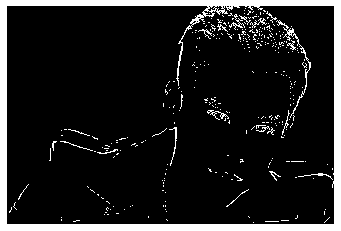

In [10]:
img=cv2.cvtColor(dst,cv2.COLOR_GRAY2BGR)
show(img)

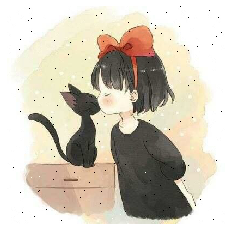

In [11]:
NoiseImg=cv2.imread('image1.jpg',1)
NoiseImg=cv2.cvtColor(NoiseImg,cv2.COLOR_BGR2RGB)
show(NoiseImg)#读取并查看

In [12]:
#中值滤波
NoiseImg=cv2.imread('image1.jpg',1)
img=NoiseImg
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]
dst=np.zeros(imgInfo,np.uint8)
for i in range(1,height-1):
    for j in range(1,width-1):
        hb=img[i-1:i+2,j-1:j+2,0]
        hg=img[i-1:i+2,j-1:j+2,1]
        hr=img[i-1:i+2,j-1:j+2,2]
        hb=hb.reshape(9,)
        hg=hg.reshape(9,)
        hr=hr.reshape(9,)
        (b,g,r)=(np.sort(hb)[4],np.sort(hg)[4],np.sort(hr)[4])#np.sort进行排序 因为是3*3 所以第四个为中值，从0开始下标
        dst[i,j]=(b,g,r)
cv2.imshow('dst',dst)
cv2.imshow('imae',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

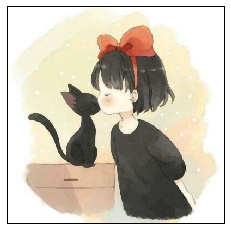

In [13]:
dst=cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
show(dst)#展示

In [14]:
dst=cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite('new_image1.jpg',dst)#保存一下文件 为均衡直方图做准备

True

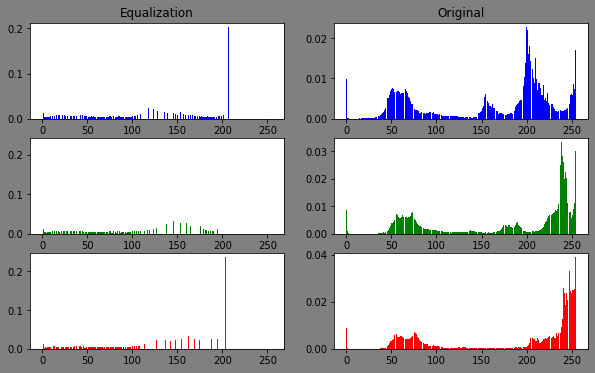

总用时 7.800805200000013 秒


In [15]:
#均衡直方图
import time
start=time.perf_counter()
img=cv2.imread('new_image1.jpg',1)
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

count_b = np.zeros(256,np.float)
count_g = np.zeros(256,np.float)
count_r = np.zeros(256,np.float)
count_b=cv2.calcHist([img],[0],None,[256],[0,255])
count_g=cv2.calcHist([img],[1],None,[256],[0,255])
count_r=cv2.calcHist([img],[2],None,[256],[0,255])
for i in range(0,255):
    count_b[i] = count_b[i]/(height*width)
    count_g[i] = count_g[i]/(height*width)
    count_r[i] = count_r[i]/(height*width)
sum_b = float(0)
sum_g = float(0)
sum_r = float(0)
for i in range(0,256):
    sum_b = sum_b+count_b[i]
    sum_g = sum_g+count_g[i]
    sum_r = sum_r+count_r[i]
    count_b[i] = sum_b
    count_g[i] = sum_g
    count_r[i] = sum_r
map_b = np.zeros(256,np.uint16)
map_g = np.zeros(256,np.uint16)
map_r = np.zeros(256,np.uint16)
for i in range(0,256):#累计概率乘以一个255得到一个新的像素值
    map_b[i] = np.uint16(count_b[i]*255)
    map_g[i] = np.uint16(count_g[i]*255)
    map_r[i] = np.uint16(count_r[i]*255)
dst = np.zeros((height,width,3),np.uint8)
for i in range(0,height):
    for j in range(0,width):
        (b,g,r) = img[i,j]
        # 赋值，把新的像素值(总共有256个)赋值给对应的像素点
        b = map_b[b]
        g = map_g[g]
        r = map_r[r]
        dst[i,j] = (b,g,r)

histb=cv2.calcHist([dst],[0],None,[256],[0,255])
histg=cv2.calcHist([dst],[1],None,[256],[0,255])
histr=cv2.calcHist([dst],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)  
x = np.linspace(0,255,256)
yb=histb
yg=histg
yr=histr
fig = plt.figure(figsize=(10,6),facecolor = 'gray')
ax1 = fig.add_subplot(3,2,1)
plt.bar(x,yb,0.9,alpha = 1 ,color = 'b')
plt.title('Equalization')
ax3 = fig.add_subplot(3,2,3)
plt.bar(x,yg,0.9,alpha = 1 ,color = 'g')
ax6 = fig.add_subplot(3,2,5)
plt.bar(x,yr,0.9,alpha = 1 ,color = 'r')
histb=cv2.calcHist([img],[0],None,[256],[0,255])
histg=cv2.calcHist([img],[1],None,[256],[0,255])
histr=cv2.calcHist([img],[2],None,[256],[0,255])
histb=histb.reshape(256,)
histg=histg.reshape(256,)
histr=histr.reshape(256,)
for i in range(0,256):
    histb[i] = histb[i]/(height*width)
    histg[i] = histg[i]/(height*width)
    histr[i] = histr[i]/(height*width)


yb_x=histb
yg_x=histg
yr_x=histr

ax2 = fig.add_subplot(3,2,2)
plt.bar(x,yb_x,0.9,alpha = 1 ,color = 'b')
plt.title('Original')

ax4 = fig.add_subplot(3,2,4)
plt.bar(x,yg_x,0.9,alpha = 1 ,color = 'g')
ax5 = fig.add_subplot(3,2,6)
plt.bar(x,yr_x,0.9,alpha = 1 ,color = 'r')
plt.show()

cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
end=time.perf_counter()
print('总用时',end-start,'秒')

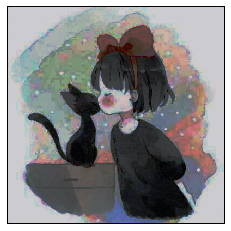

In [16]:
dst=cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
show(dst)#展示